# 🛠️ Task 1: Data Preprocessing for Machine Learning
## 📋 Internship: Codveda Technologies | Machine Learning Intern

---

# ### Required Tasks (✅ Completed):
# - ✅ Handle missing data
# - ✅ Encode categorical variables (`RAD`)
# - ✅ Normalize or standardize numerical features
# - ✅ Split the dataset into training and testing sets
#
# ### Additional Enhancements (⭐ Added):
# - ⭐ Outlier detection and handling
# - ⭐ Exploratory visualizations (Histograms, Heatmap, Pairplot)
# - ⭐ Cross-validation check
# - ⭐ Comparison of StandardScaler vs. MinMaxScaler

**Author**: Mahmoud Mohamed Abas Mohamed
**Date**: July 2025  

## Dataset Description
| Column  | Description                                            |
|---------|--------------------------------------------------------|
| CRIM    | Per capita crime rate by town                          |
| ZN      | Proportion of residential land zoned for lots          |
| INDUS   | Proportion of non-retail business acres per town       |
| CHAS    | Charles River dummy variable                           |
| NOX     | Nitric oxides concentration                            |
| RM      | Average number of rooms per dwelling                   |
| AGE     | Proportion of owner-occupied units built prior to 1940 |
| DIS     | Weighted distances to five Boston employment centers   |
| RAD     | Index of accessibility to radial highways              |
| TAX     | Full-value property-tax rate per $10,000               |
| PTRATIO | Pupil-teacher ratio by town                            |
| B       | Proportion of blacks by town                           |
| LSTAT   | % lower status of the population                       |
| MEDV    | Median value of owner-occupied homes in $1000's        |

# IMPORT LIBRARIES


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

# LOAD DATASET


In [4]:
df = pd.read_csv('house_Prediction_Data_Set.csv', sep='\s+', header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
              'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# MISSING VALUES CHECK


In [6]:
missing = df.isnull().sum()
print("Missing Values in Each Column:\n", missing)

if missing.sum() == 0:
    print("\nNo Missing Values Found in the Dataset.")

Missing Values in Each Column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No Missing Values Found in the Dataset.


# INITIAL EXPLORATION


In [10]:
print("\nDataset Info:")
df.info()
print("\n\nDataset Shape:", df.shape)
print("\n\nDescriptive Stats:\n", df.describe())

print("\n\nUnique Values in Categorical Columns:")
print(f"\nCHAS: {df['CHAS'].nunique()} unique values")
print(f"\nRAD (before encoding): {df['RAD'].nunique()} unique values")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Dataset Shape: (506, 14)


Descriptive Stats:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     

# OUTLIER DETECTION (IQR)



Outlier Detection : 

CRIM: 66 outliers
ZN: 68 outliers
INDUS: 0 outliers
NOX: 0 outliers
RM: 30 outliers
AGE: 0 outliers
DIS: 5 outliers
TAX: 0 outliers
PTRATIO: 15 outliers
B: 77 outliers
LSTAT: 7 outliers
MEDV: 40 outliers


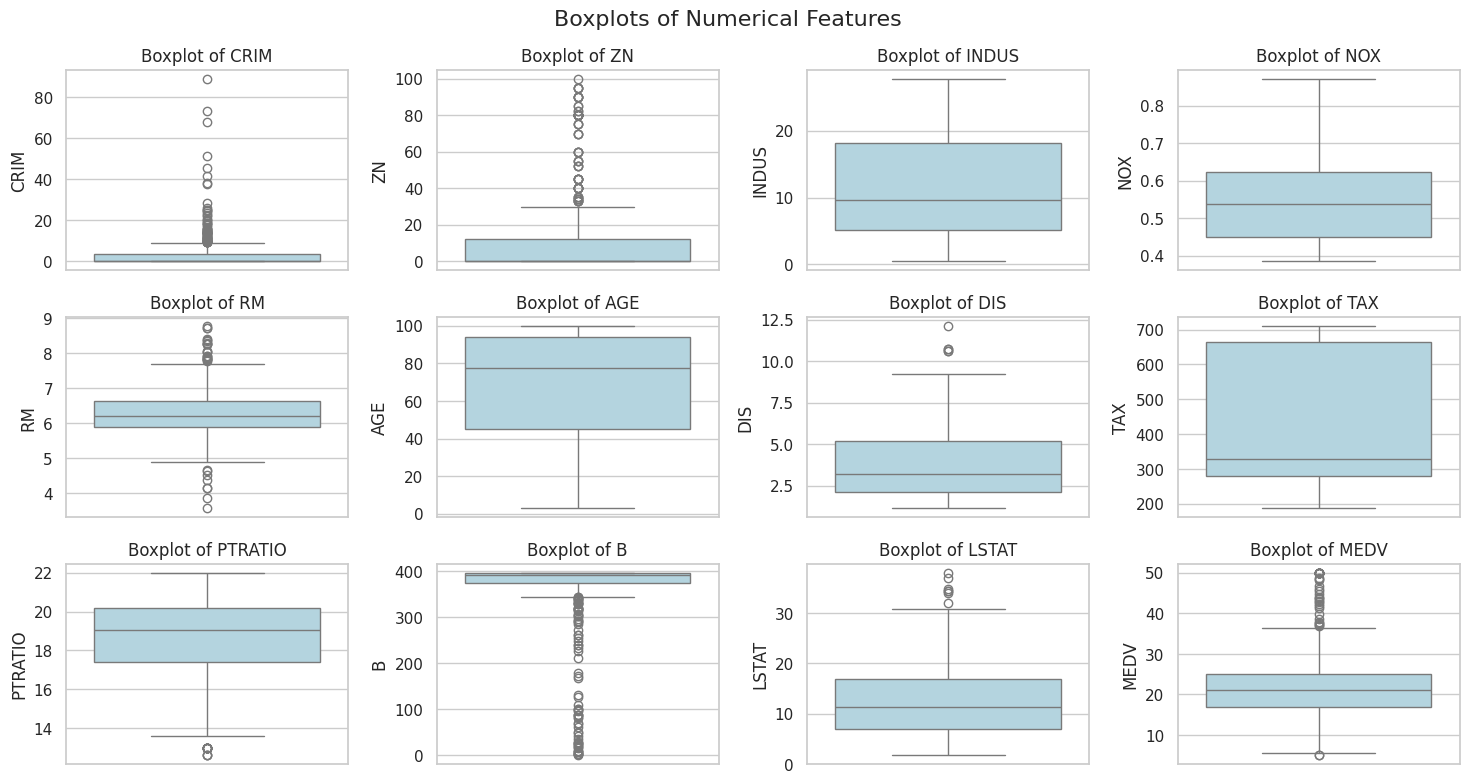

In [13]:
print("\nOutlier Detection : \n")
numerical_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM',
                  'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers")
    return lower, upper, outliers

outlier_bounds = {}
for col in numerical_cols:
    lower, upper, _ = detect_outliers(df, col)
    outlier_bounds[col] = (lower, upper)

# Boxplots for Outlier Visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", fontsize=16, y=1.02)
plt.show()

# HANDLE OUTLIERS (Capping)

In [15]:
# Cap outliers by replacing values below/above bounds with the respective bounds
for col in numerical_cols:
    lower, upper = outlier_bounds[col]
    df[col] = df[col].clip(lower=lower, upper=upper)

print("\nOutliers Handled by Capping : \n")
for col in numerical_cols:
    lower, upper = outlier_bounds[col]
    new_outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {len(new_outliers)} outliers after capping")


Outliers Handled by Capping : 

CRIM: 0 outliers after capping
ZN: 0 outliers after capping
INDUS: 0 outliers after capping
NOX: 0 outliers after capping
RM: 0 outliers after capping
AGE: 0 outliers after capping
DIS: 0 outliers after capping
TAX: 0 outliers after capping
PTRATIO: 0 outliers after capping
B: 0 outliers after capping
LSTAT: 0 outliers after capping
MEDV: 0 outliers after capping


# VISUAL EXPLORATION

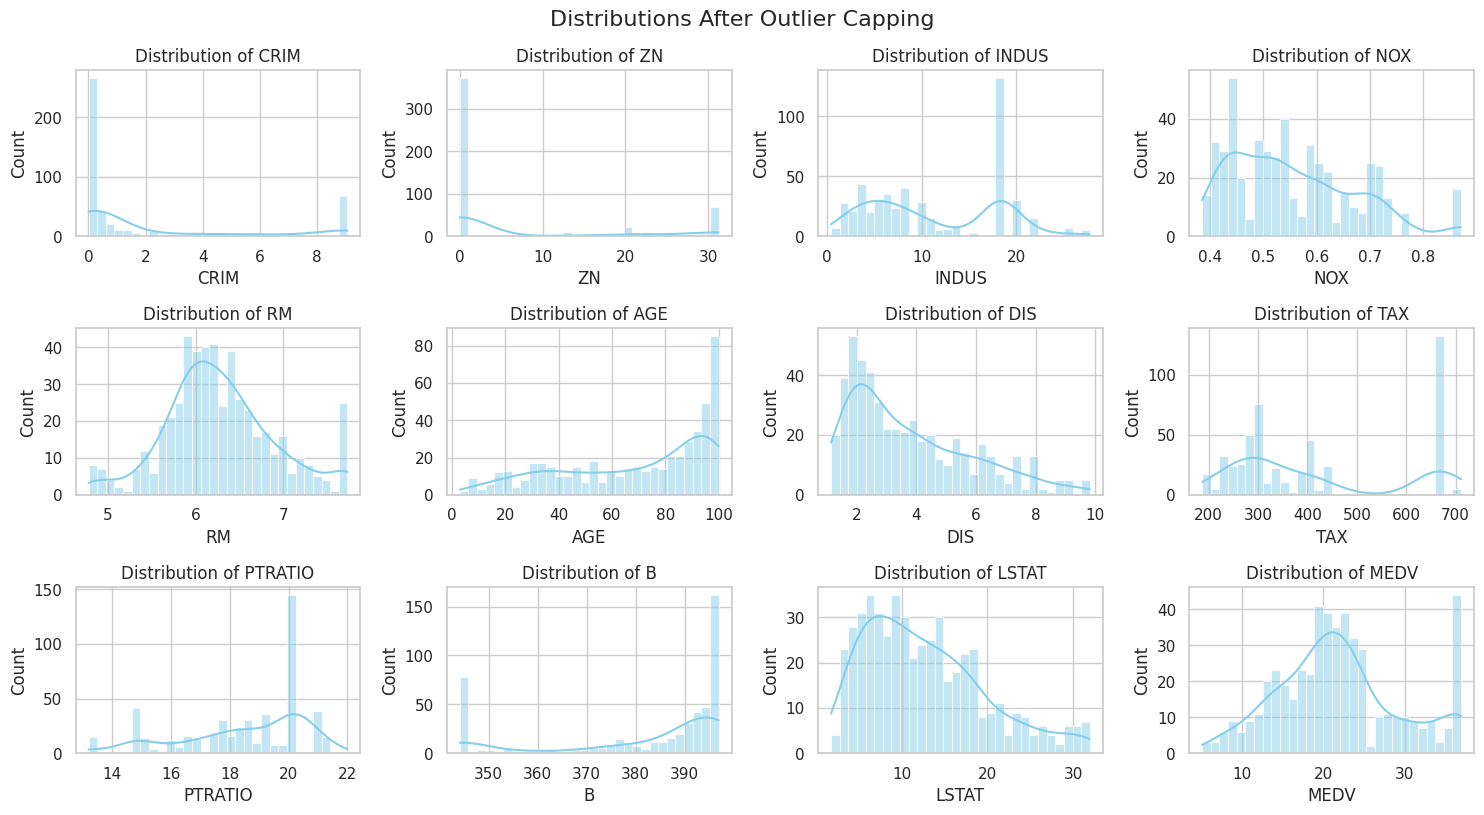

In [16]:
# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle("Distributions After Outlier Capping", fontsize=16, y=1.02)
plt.show()

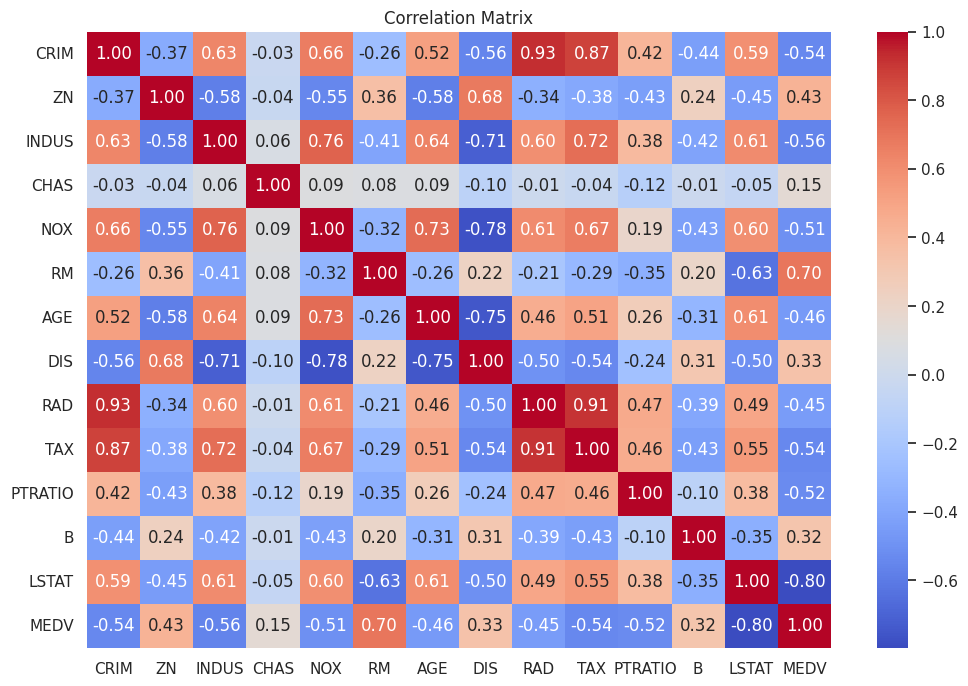

In [17]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

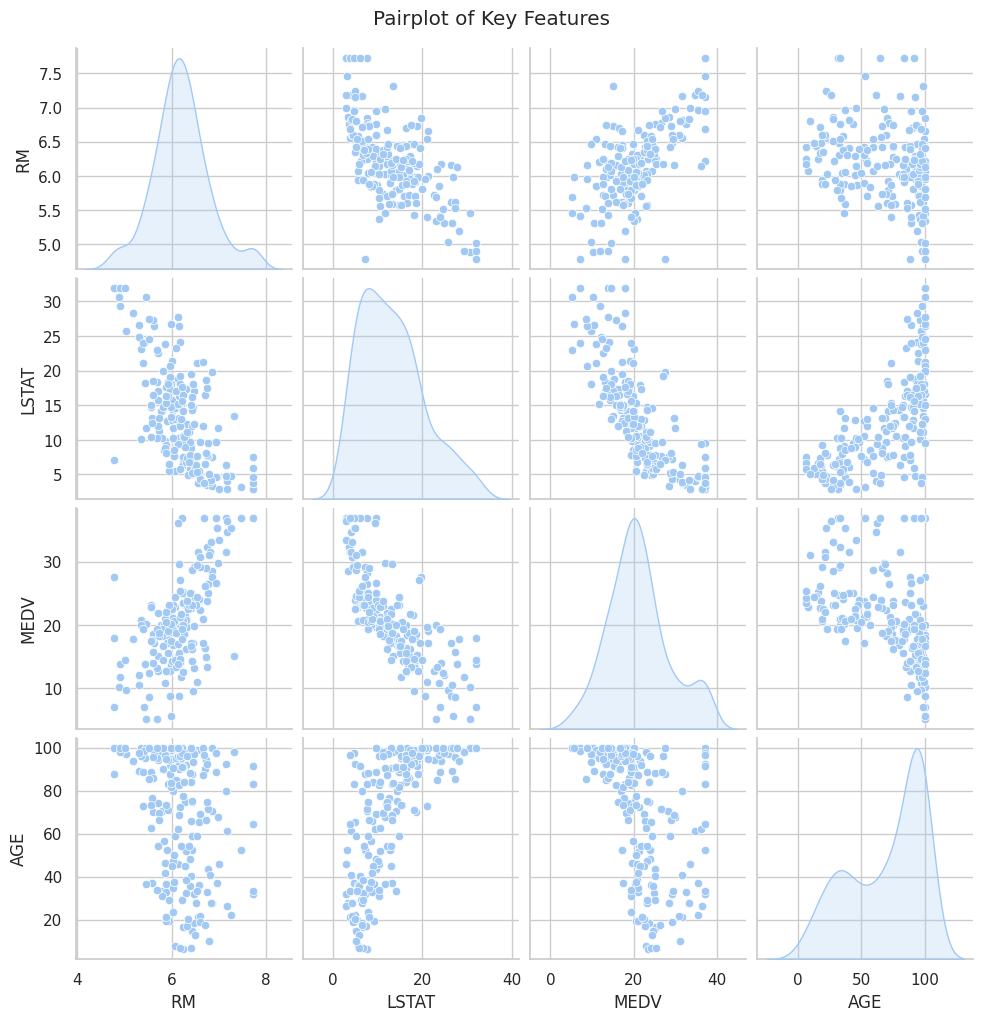

In [18]:
# Pairplot (sample)
sample_df = df.sample(200, random_state=42)
sns.pairplot(sample_df[['RM', 'LSTAT', 'MEDV', 'AGE']], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# ENCODING

In [19]:
df = pd.get_dummies(df, columns=['RAD'], prefix='RAD', drop_first=True)

# SCALING

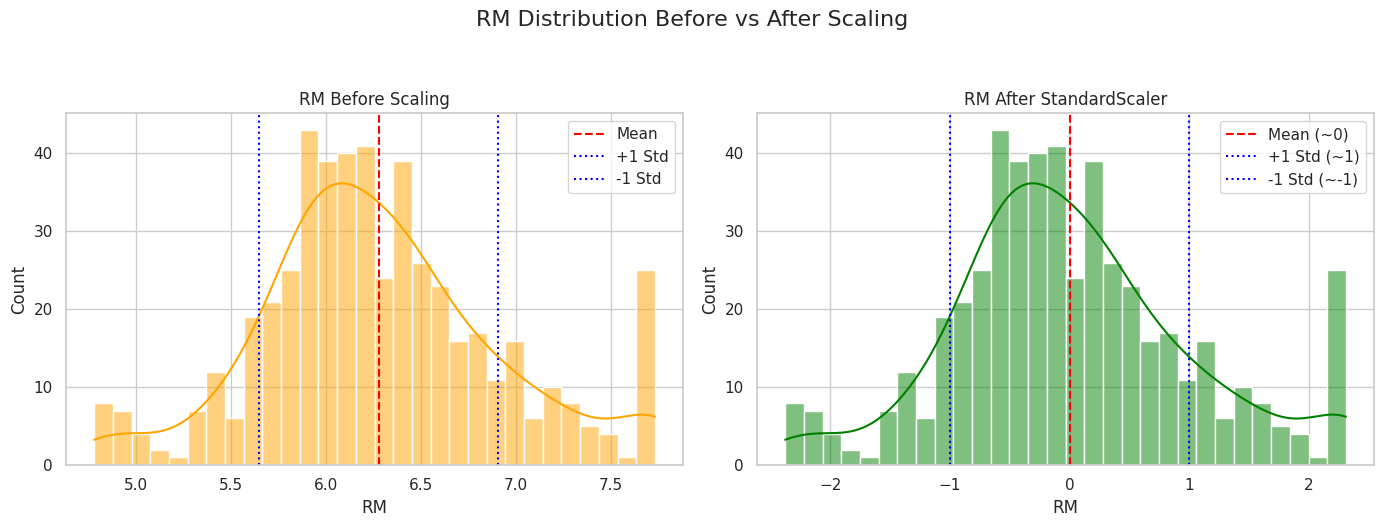

In [20]:
# Numerical features are standardized using `StandardScaler` to achieve a mean of 0 and a standard deviation of 1.
# This method is preferred over `MinMaxScaler` because it is less sensitive to outliers and better suited for algorithms like Linear Regression that assume normally distributed data.

X = df.drop('MEDV', axis=1)
y = df['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
X_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# Compare RM Before & After Scaling with lines
X_before_scaling = df.drop('MEDV', axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(X_before_scaling['RM'], kde=True, bins=30, ax=axes[0], color='orange')
axes[0].axvline(X_before_scaling['RM'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(X_before_scaling['RM'].mean() + X_before_scaling['RM'].std(), color='blue', linestyle=':', label='+1 Std')
axes[0].axvline(X_before_scaling['RM'].mean() - X_before_scaling['RM'].std(), color='blue', linestyle=':', label='-1 Std')
axes[0].set_title('RM Before Scaling')
axes[0].legend()

sns.histplot(X_scaled['RM'], kde=True, bins=30, ax=axes[1], color='green')
axes[1].axvline(X_scaled['RM'].mean(), color='red', linestyle='--', label='Mean (~0)')
axes[1].axvline(X_scaled['RM'].mean() + X_scaled['RM'].std(), color='blue', linestyle=':', label='+1 Std (~1)')
axes[1].axvline(X_scaled['RM'].mean() - X_scaled['RM'].std(), color='blue', linestyle=':', label='-1 Std (~-1)')
axes[1].set_title('RM After StandardScaler')
axes[1].legend()

plt.suptitle("RM Distribution Before vs After Scaling", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# TRAIN-TEST SPLIT

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
print(f"\n✅ Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


✅ Train Shape: (404, 20), Test Shape: (102, 20)


# CROSS-VALIDATION

In [23]:
model_lr = LinearRegression()
model_ridge = Ridge(alpha=1.0)

scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='r2')
scores_ridge = cross_val_score(model_ridge, X_train, y_train, cv=5, scoring='r2')

print(f"\nLinear Regression R^2 Scores : {scores_lr}")
print(f"Average Linear Regression R^2 : {scores_lr.mean():.3f} (+/- {scores_lr.std() * 2:.3f})")
print(f"Ridge Regression R^2 Scores : {scores_ridge}")
print(f"Average Ridge Regression R^2 : {scores_ridge.mean():.3f} (+/- {scores_ridge.std() * 2:.3f})")


Linear Regression R^2 Scores : [0.77241571 0.77761482 0.81001966 0.82096802 0.73083078]
Average Linear Regression R^2 : 0.782 (+/- 0.063)
Ridge Regression R^2 Scores : [0.77198098 0.78007565 0.80984327 0.82061102 0.7294259 ]
Average Ridge Regression R^2 : 0.782 (+/- 0.064)


## Notes on Cross-Validation
# The R² scores improved after handling outliers with capping, reducing variance from ~0.119 (before capping) to ~0.063 (Linear Regression) and ~0.064 (Ridge). This indicates that the preprocessing steps enhanced model consistency across folds.

# SAVE

In [24]:
X_train.to_csv('X_train_preprocessed.csv', index=False)
X_test.to_csv('X_test_preprocessed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("\n✅ Preprocessed data saved!")


✅ Preprocessed data saved!


# **Conclusion**
# ✅ All steps completed: Missing Values ✔️ | Outlier Check & Handling ✔️ | Encoding ✔️ | Scaling ✔️ | Split ✔️ | EDA ✔️
# **Next Steps**: Train machine learning models (e.g., Linear Regression, Ridge, Random Forest) using the preprocessed data.